## 1. Data Wrangling

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fileName = 'GlobalLandTemperaturesByCountry.csv'
df = pd.read_csv(fileName)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [4]:
df['Date'] = pd.to_datetime(df['dt'])
df['Country'] = df['Country'].str.upper()
df = df[['Date','Country','AverageTemperature']]

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544811 entries, 0 to 577460
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                544811 non-null  datetime64[ns]
 1   Country             544811 non-null  object        
 2   AverageTemperature  544811 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 16.6+ MB


### Exploring the data

In [6]:
#Number of missing values per column
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count')

,count,%
Date,0,0.0
Country,0,0.0
AverageTemperature,0,0.0


In [7]:
#Check if we have duplicated entries
df[df.duplicated()==True]

,Date,Country,AverageTemperature


In [8]:
#Which are the valid countries today?
import requests
url = 'https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/'
html = requests.get(url).content
df_list = pd.read_html(html)
country_list = pd.DataFrame(df_list[0])
valid_country_list = np.sort(country_list['Country'].str.upper().values)
valid_country_list

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANDORRA', 'ANGOLA',
       'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA', 'AUSTRALIA',
       'AUSTRIA', 'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN', 'BANGLADESH',
       'BARBADOS', 'BELARUS', 'BELGIUM', 'BELIZE', 'BENIN', 'BHUTAN',
       'BOLIVIA', 'BOSNIA AND HERZEGOVINA', 'BOTSWANA', 'BRAZIL',
       'BRUNEI', 'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'CABO VERDE',
       'CAMBODIA', 'CAMEROON', 'CANADA', 'CENTRAL AFRICAN REPUBLIC',
       'CHAD', 'CHILE', 'CHINA', 'COLOMBIA', 'COMOROS', 'CONGO',
       'COSTA RICA', 'CROATIA', 'CUBA', 'CYPRUS',
       'CZECH REPUBLIC (CZECHIA)', "CÔTE D'IVOIRE", 'DENMARK', 'DJIBOUTI',
       'DOMINICA', 'DOMINICAN REPUBLIC', 'DR CONGO', 'ECUADOR', 'EGYPT',
       'EL SALVADOR', 'EQUATORIAL GUINEA', 'ERITREA', 'ESTONIA',
       'ESWATINI', 'ETHIOPIA', 'FIJI', 'FINLAND', 'FRANCE', 'GABON',
       'GAMBIA', 'GEORGIA', 'GERMANY', 'GHANA', 'GREECE', 'GRENADA',
       'GUATEMALA', 'GUINEA', 'GUINEA-BISSAU', 'GUYANA', 'H

In [9]:
#We expect only 195 countries in the world today, let's see how many there are in this dataset
countries_in_data = df['Country'].unique()
len(df['Country'].unique())
countries_in_data

array(['ÅLAND', 'AFGHANISTAN', 'AFRICA', 'ALBANIA', 'ALGERIA',
       'AMERICAN SAMOA', 'ANDORRA', 'ANGOLA', 'ANGUILLA',
       'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA', 'ARUBA', 'ASIA',
       'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN',
       'BAKER ISLAND', 'BANGLADESH', 'BARBADOS', 'BELARUS', 'BELGIUM',
       'BELIZE', 'BENIN', 'BHUTAN', 'BOLIVIA',
       'BONAIRE, SAINT EUSTATIUS AND SABA', 'BOSNIA AND HERZEGOVINA',
       'BOTSWANA', 'BRAZIL', 'BRITISH VIRGIN ISLANDS', 'BULGARIA',
       'BURKINA FASO', 'BURMA', 'BURUNDI', "CÔTE D'IVOIRE", 'CAMBODIA',
       'CAMEROON', 'CANADA', 'CAPE VERDE', 'CAYMAN ISLANDS',
       'CENTRAL AFRICAN REPUBLIC', 'CHAD', 'CHILE', 'CHINA',
       'CHRISTMAS ISLAND', 'COLOMBIA', 'COMOROS',
       'CONGO (DEMOCRATIC REPUBLIC OF THE)', 'CONGO', 'COSTA RICA',
       'CROATIA', 'CUBA', 'CURAÇAO', 'CYPRUS', 'CZECH REPUBLIC',
       'DENMARK (EUROPE)', 'DENMARK', 'DJIBOUTI', 'DOMINICA',
       'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT'

In [10]:
import numpy as np
wrong_countries = np.setdiff1d(countries_in_data,valid_country_list)
wrong_countries

array(['AFRICA', 'AMERICAN SAMOA', 'ANGUILLA', 'ARUBA', 'ASIA',
       'BAKER ISLAND', 'BONAIRE, SAINT EUSTATIUS AND SABA',
       'BRITISH VIRGIN ISLANDS', 'BURMA', 'CAPE VERDE', 'CAYMAN ISLANDS',
       'CHRISTMAS ISLAND', 'CONGO (DEMOCRATIC REPUBLIC OF THE)',
       'CURAÇAO', 'CZECH REPUBLIC', 'DENMARK (EUROPE)', 'EUROPE',
       'FALKLAND ISLANDS (ISLAS MALVINAS)', 'FAROE ISLANDS',
       'FEDERATED STATES OF MICRONESIA', 'FRANCE (EUROPE)',
       'FRENCH GUIANA', 'FRENCH POLYNESIA',
       'FRENCH SOUTHERN AND ANTARCTIC LANDS', 'GAZA STRIP', 'GREENLAND',
       'GUADELOUPE', 'GUAM', 'GUERNSEY', 'GUINEA BISSAU',
       'HEARD ISLAND AND MCDONALD ISLANDS', 'HONG KONG', 'ISLE OF MAN',
       'JERSEY', 'KINGMAN REEF', 'MACAU', 'MACEDONIA', 'MARTINIQUE',
       'MAYOTTE', 'MONTSERRAT', 'NETHERLANDS (EUROPE)', 'NEW CALEDONIA',
       'NIUE', 'NORTH AMERICA', 'NORTHERN MARIANA ISLANDS', 'OCEANIA',
       'PALESTINA', 'PALMYRA ATOLL', 'PUERTO RICO', 'REUNION',
       'SAINT BARTHÉLEMY', 

In [11]:
df.replace('CAPE VERDE', 'CABO VERDE', inplace=True)
df.replace('CONGO (DEMOCRATIC REPUBLIC OF THE)', 'DR CONGO', inplace=True)
df.replace('CZECH REPUBLIC', 'CZECH REPUBLIC (CZECHIA)', inplace=True)
df.replace('DENMARK (EUROPE)', 'DENMARK', inplace=True)
df.replace('FEDERATED STATES OF MICRONESIA', 'MICRONESIA', inplace=True)
df.replace('FRANCE (EUROPE)', 'FRANCE', inplace=True)
df.replace('GUINEA BISSAU', 'GUINEA-BISSAU', inplace=True)
df.replace('MACEDONIA', 'NORTH MACEDONIA', inplace=True)
df.replace('NETHERLANDS (EUROPE)', 'NETHERLANDS', inplace=True)
df.replace('SAINT KITTS AND NEVIS', 'SAINT KITTS & NEVIS', inplace=True)
df.replace('SAINT VINCENT AND THE GRENADINES', 'ST. VINCENT & GRENADINES', inplace=True)
df.replace('SAO TOME AND PRINCIPE', 'SAO TOME & PRINCIPE', inplace=True)
df.replace('TIMOR LESTE', 'TIMOR-LESTE', inplace=True)
df.replace('UNITED KINGDOM (EUROPE)', 'UNITED KINGDOM', inplace=True)
#df.replace('', '', inplace=True)
#df.replace('', '', inplace=True)
#df.replace('', '', inplace=True)

In [12]:
# Filter all rows for which the country is valid
df = df[~df['Country'].isin(wrong_countries)]
df.head()

,Date,Country,AverageTemperature
3239,1838-04-01,AFGHANISTAN,13.008
3241,1838-06-01,AFGHANISTAN,23.950
3242,1838-07-01,AFGHANISTAN,26.877
3243,1838-08-01,AFGHANISTAN,24.938
3244,1838-09-01,AFGHANISTAN,18.981


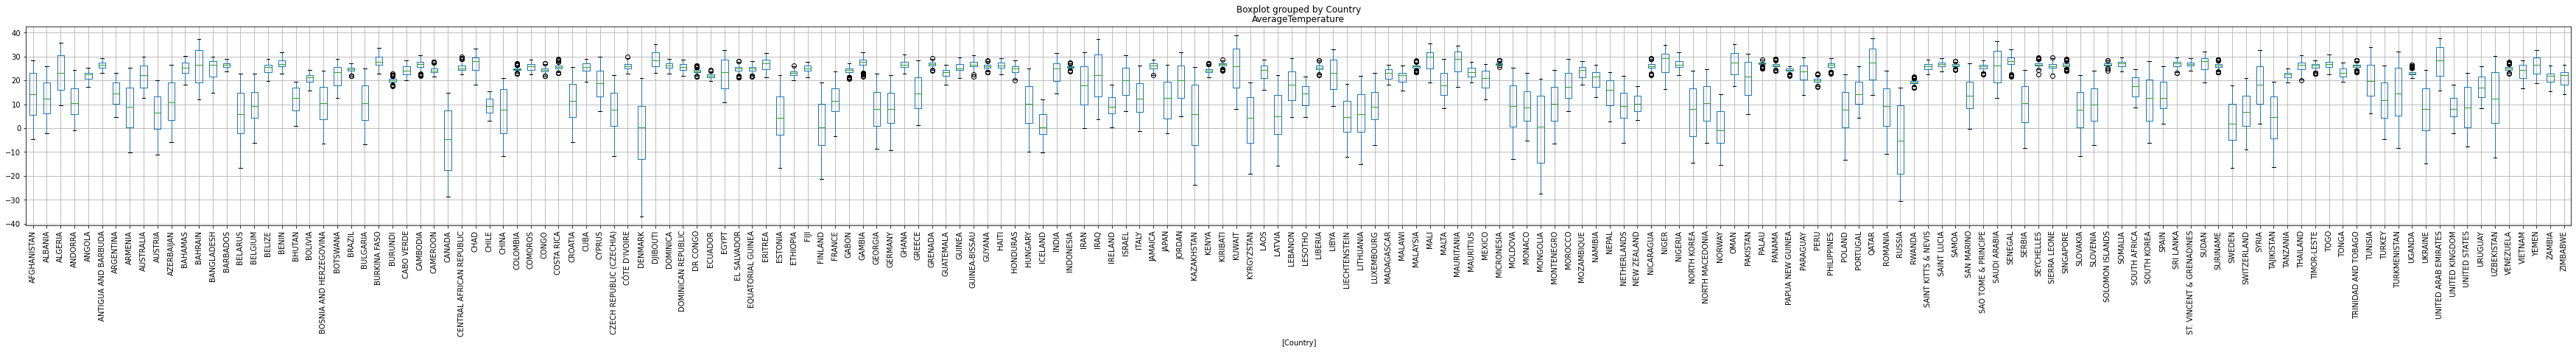

In [13]:
boxplot = df[['Country','AverageTemperature']].boxplot(by='Country',figsize=(60,5), rot=90)
plt.savefig('AverageTempByCountry.jpeg')
#All units seems to be in Celsius

In [14]:
#Select the country for which you want to do the analysis
import ipywidgets as widgets
country = widgets.Dropdown(
    options=valid_country_list,
    value='UNITED STATES',
    description='Country:',
    disabled=False,
)
def plot_country(country):
    temp_df = df[df['Country']==country]
    temp_df = temp_df.set_index('Date')
    temp_df = temp_df.resample('M').mean()
    temp_df.plot(figsize=(30,5))
    return temp_df
display(country)

Dropdown(description='Country:', index=186, options=('AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANDORRA', 'ANGOLA',…

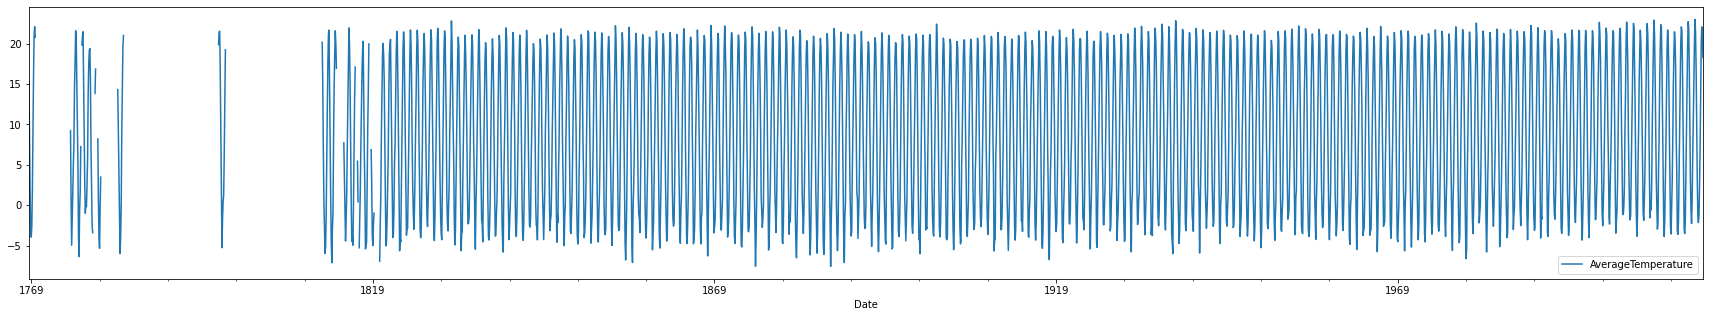

In [15]:
monthly_temp_by_country_df = plot_country(country.value)

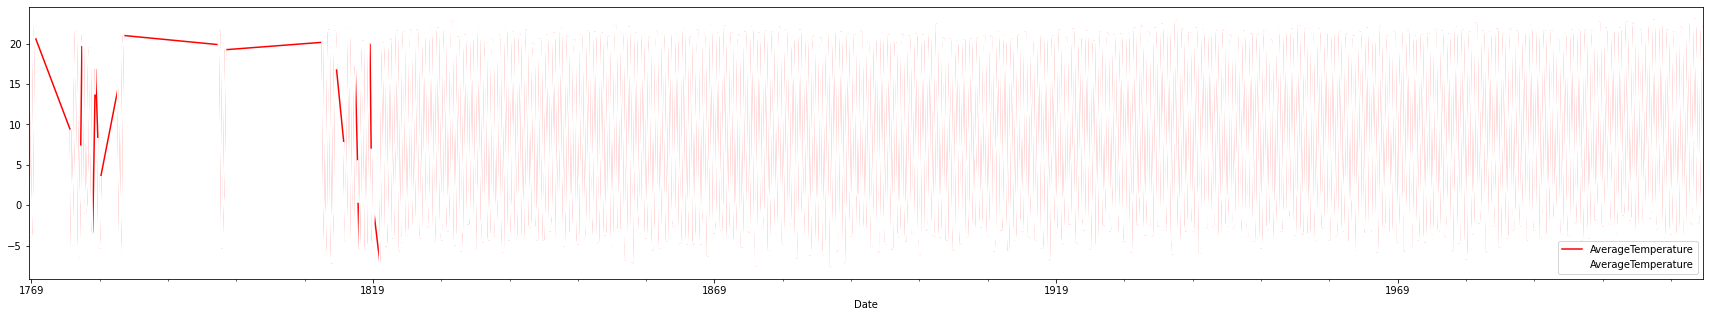

In [16]:
missing = monthly_temp_by_country_df.isna()
temp_interp = monthly_temp_by_country_df.interpolate('linear')
ax = temp_interp.plot(c='r')
monthly_temp_by_country_df.plot(c='white', ax=ax, lw=2, figsize=(30,5))
plt.savefig(country.value+'_adjustedTemp.jpeg')

In [17]:
monthly_temp_by_country_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2941 entries, 1768-09-30 to 2013-09-30
Freq: M
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  2482 non-null   float64
dtypes: float64(1)
memory usage: 46.0 KB


## 2. Exploratory Data Analysis

C:\Users\Miguel-BarrigaSerran\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


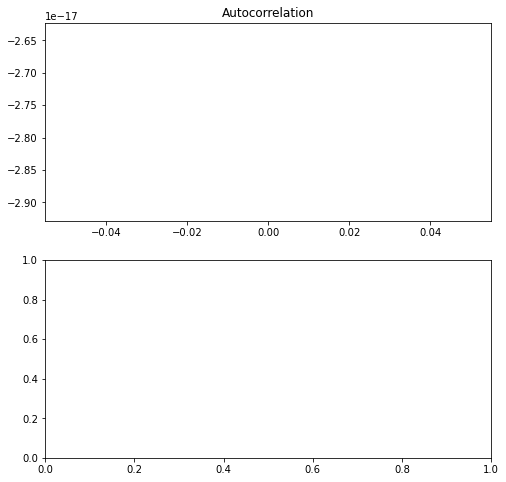

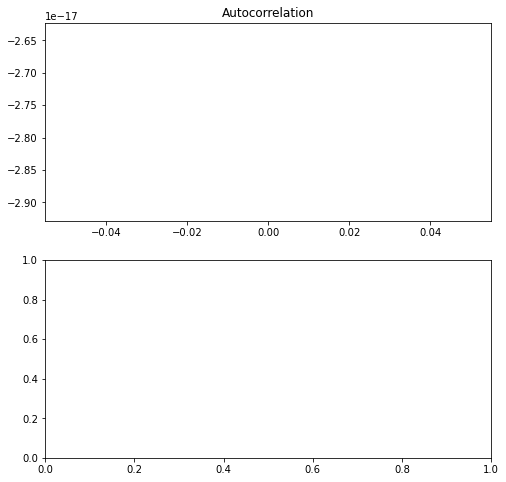

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
plot_acf(monthly_temp_by_country_df['AverageTemperature'], lags=12, zero=False, ax=ax1)

In [55]:
#Calculating autocorrelation
monthly_temp_by_country_df['Return'] = monthly_temp_by_country_df['AverageTemperature'].pct_change()
autocorrelation = monthly_temp_by_country_df['Return'].autocorr()
print("The autocorrelation is: ",autocorrelation)

The autocorrelation is:  -0.005109568640920538


The negative autocorrelation means that the temperature is "mean reverting"

In [60]:
monthly_temp_diff = monthly_temp_by_country_df['AverageTemperature'].pct_change()
autocorrelation = monthly_temp_diff.autocorr()

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]


C:\Users\Miguel-BarrigaSerran\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\Miguel-BarrigaSerran\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Miguel-BarrigaSerran\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


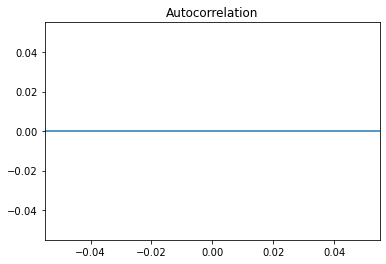

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
plot_acf(monthly_temp_by_country_df['Return'], lags = 1, alpha=0.05)
print(acf(monthly_temp_by_country_df['Return']))